In [1]:
#!pip install pandas
import pandas as pd
import numpy as np
#!pip install seaborn
import seaborn as sns
#!pip install matplotlib
%matplotlib inline
import matplotlib.pyplot as plt




In [2]:
from datetime import date,timedelta

In [3]:
#!pip install holidays
import holidays

In [4]:
!pip install ipywidgets

You should consider upgrading via the 'C:\Users\design\Desktop\Алена.Обучение\Pyton\VE\Scripts\python.exe -m pip install --upgrade pip' command.


In [5]:
#!pip install pystan

In [6]:
#!pip install prophet
from prophet import Prophet

In [7]:
#!pip install plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

In [362]:
df=pd.read_csv("Online Retail.csv")

In [363]:
df.head()

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country
0,536365,01-12-2010,08:26:00 AM,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom
1,536365,01-12-2010,08:26:00 AM,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom
2,536365,01-12-2010,08:26:00 AM,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom
3,536365,01-12-2010,08:26:00 AM,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom
4,536365,01-12-2010,08:26:00 AM,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom


In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   InvoiceTime  541909 non-null  object 
 3   StockCode    541909 non-null  object 
 4   Description  540455 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Totalsale    541909 non-null  float64
 8   CustomerID   406829 non-null  float64
 9   Country      541909 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 41.3+ MB


In [365]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

C:\Users\design\AppData\Local\Temp\ipykernel_68988\3737639551.py:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [366]:
df.duplicated().sum() #есть дубликаты

5268

In [367]:
df.drop_duplicates()

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country
0,536365,2010-01-12,08:26:00 AM,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom
1,536365,2010-01-12,08:26:00 AM,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom
2,536365,2010-01-12,08:26:00 AM,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom
3,536365,2010-01-12,08:26:00 AM,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom
4,536365,2010-01-12,08:26:00 AM,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-09-12,12:50:00 PM,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,10.20,12680.0,France
541905,581587,2011-09-12,12:50:00 PM,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12.60,12680.0,France
541906,581587,2011-09-12,12:50:00 PM,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,16.60,12680.0,France
541907,581587,2011-09-12,12:50:00 PM,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,16.60,12680.0,France


In [368]:
df.isnull().sum()  # есть нулевые значения CustomerID и Description 

InvoiceNo           0
InvoiceDate         0
InvoiceTime         0
StockCode           0
Description      1454
Quantity            0
UnitPrice           0
Totalsale           0
CustomerID     135080
Country             0
dtype: int64

In [369]:
df_without_null=df.dropna(how='any') #удаление всех сторк содержащие null
df_without_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   InvoiceTime  406829 non-null  object        
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Totalsale    406829 non-null  float64       
 8   CustomerID   406829 non-null  float64       
 9   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 34.1+ MB


In [370]:
#df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'], format='%Y%m%d')

In [371]:
#pd.to_datetime(..., dayfirst=True): этопокажет день первый , а потом месяц и год


In [372]:
df.head()

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country
0,536365,2010-01-12,08:26:00 AM,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom
1,536365,2010-01-12,08:26:00 AM,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom
2,536365,2010-01-12,08:26:00 AM,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom
3,536365,2010-01-12,08:26:00 AM,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom
4,536365,2010-01-12,08:26:00 AM,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom


In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   InvoiceDate  541909 non-null  datetime64[ns]
 2   InvoiceTime  541909 non-null  object        
 3   StockCode    541909 non-null  object        
 4   Description  540455 non-null  object        
 5   Quantity     541909 non-null  int64         
 6   UnitPrice    541909 non-null  float64       
 7   Totalsale    541909 non-null  float64       
 8   CustomerID   406829 non-null  float64       
 9   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 41.3+ MB


In [374]:
df.shape

(541909, 10)

In [375]:
df.describe()

,Quantity,UnitPrice,Totalsale,CustomerID
count,541909.000000,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,17.987795,15287.690570
std,218.081158,96.759853,378.810824,1713.600303
min,-80995.000000,-11062.060000,-168469.600000,12346.000000
25%,1.000000,1.250000,3.400000,13953.000000
50%,3.000000,2.080000,9.750000,15152.000000
75%,10.000000,4.130000,17.400000,16791.000000
max,80995.000000,38970.000000,168469.600000,18287.000000


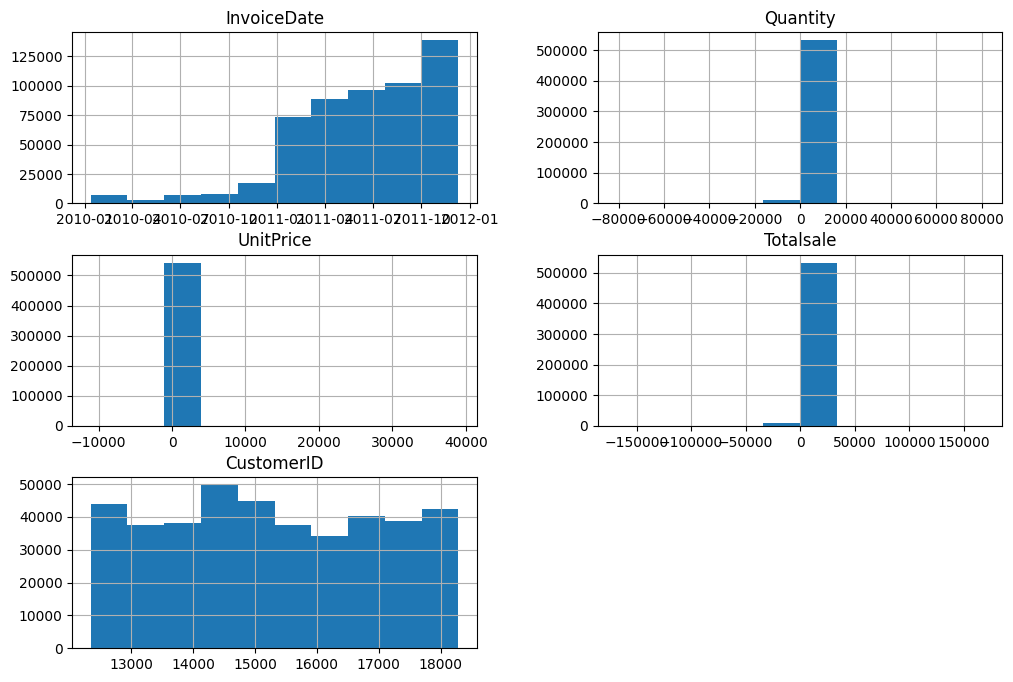

In [376]:
df.hist(figsize=(12, 8));

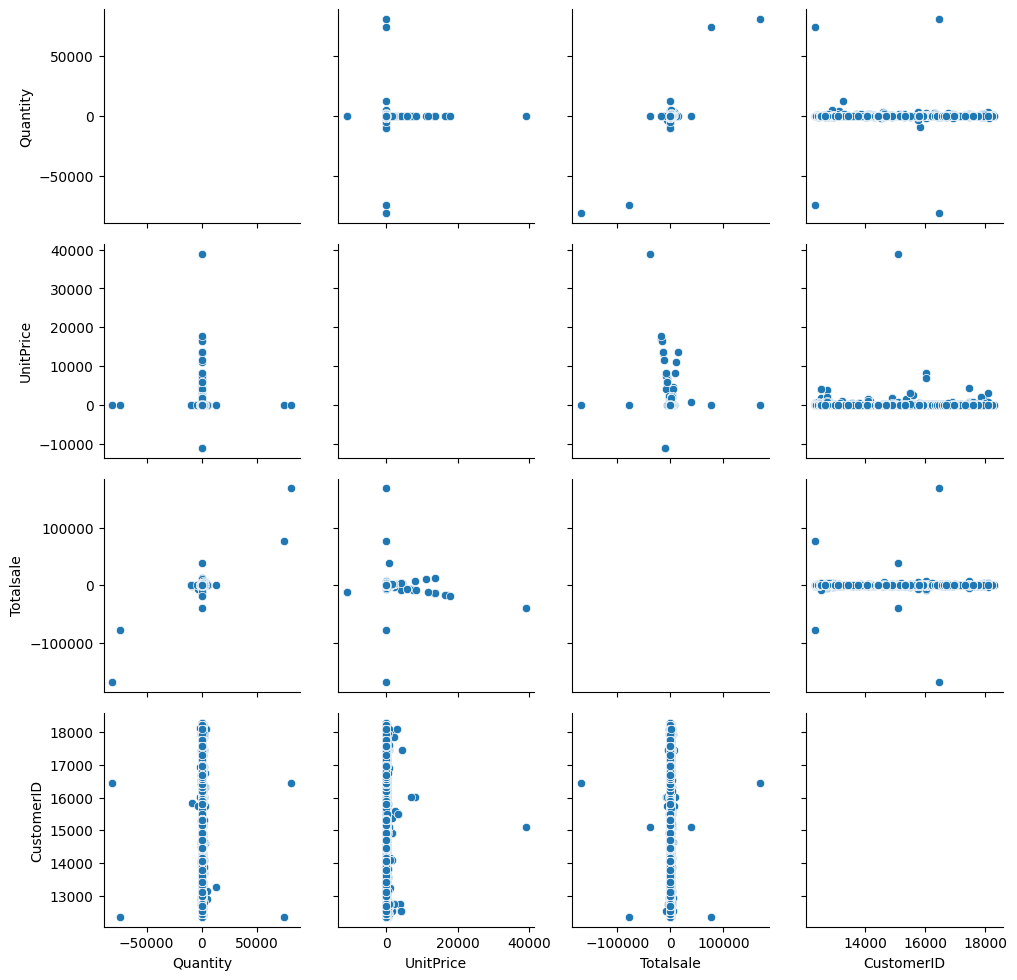

In [381]:
g = sns.PairGrid(df)
#g.map_diag(sns.histplot) не загружает
#g.map_diag(sns.distplot)?выдает ошибку устарело
g.map_offdiag(sns.scatterplot)

# Анализ продаж

In [24]:
dt=df.InvoiceDate.diff()#разница между датами продаж

In [25]:
dt

0           NaT
1        0 days
2        0 days
3        0 days
4        0 days
          ...  
541904   0 days
541905   0 days
541906   0 days
541907   0 days
541908   0 days
Name: InvoiceDate, Length: 541909, dtype: timedelta64[ns]

In [26]:
dt.value_counts() # покупки производились не каждый день. ? Как получаюся отриц значение, правильно ли утверждение?

0 days       541604
1 days          138
31 days          53
30 days          35
2 days           29
61 days          12
28 days           7
59 days           5
62 days           2
-235 days         2
-322 days         2
-176 days         1
-58 days          1
-232 days         1
-87 days          1
-234 days         1
-116 days         1
-204 days         1
-147 days         1
-174 days         1
-145 days         1
-206 days         1
-113 days         1
5 days            1
99 days           1
-86 days          1
-56 days          1
-262 days         1
-29 days          1
-293 days         1
Name: InvoiceDate, dtype: int64

<AxesSubplot: >

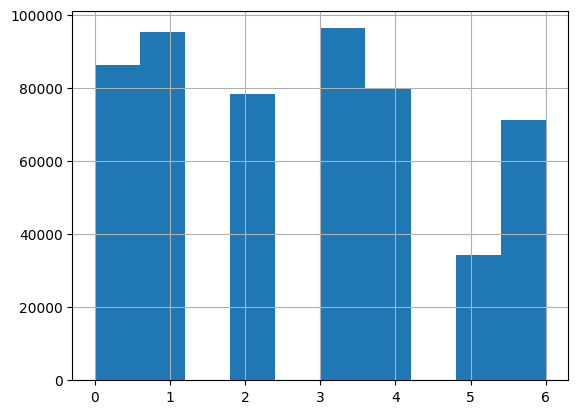

In [27]:
df.InvoiceDate.dt.day_of_week.hist()# продажи по дням недели. правильно ли утверждение?

In [28]:
df.InvoiceDate.dt.day_of_week.value_counts() #количество продаж в разные дни недели отличаются: Это дни недели или разница между днями?? в 5 день - самые низкие, а в 1и 3 день недели самые высокие


3    96343
1    95461
0    86229
4    80125
2    78368
6    71125
5    34258
Name: InvoiceDate, dtype: int64

<AxesSubplot: >

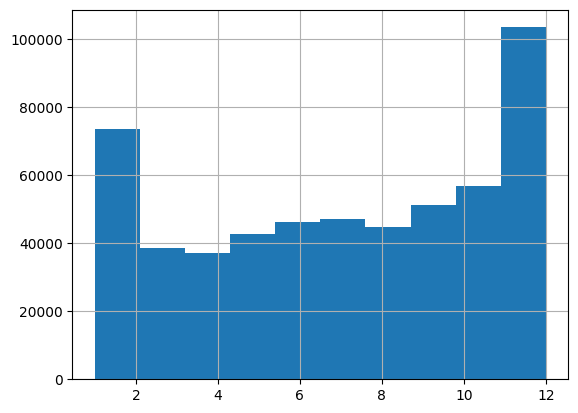

In [29]:
df.InvoiceDate.dt.month.hist() #продажи по месяцам

<AxesSubplot: >

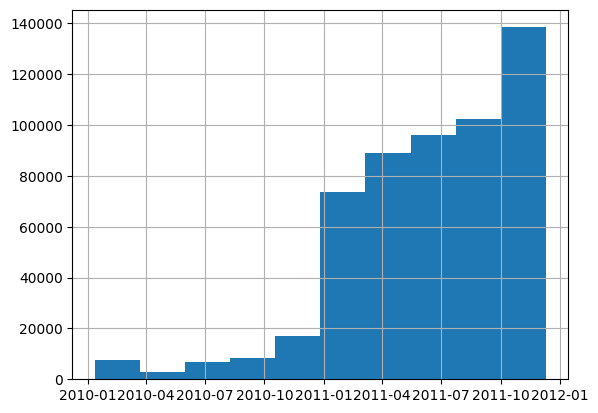

In [30]:
df.InvoiceDate.hist()#продажи по датам

In [31]:
#извлечение месяца и года
df['Month'] = pd.DatetimeIndex(df['InvoiceDate']).month


In [32]:
groupby_Month=df.groupby('Month').size() 


In [33]:
groupby_Month.sort_values(ascending=False)

Month
11    73594
10    56920
9     51289
7     47097
6     46119
8     44887
5     42659
1     39769
3     38669
4     37180
2     33841
12    29885
dtype: int64

<AxesSubplot: xlabel='Month'>

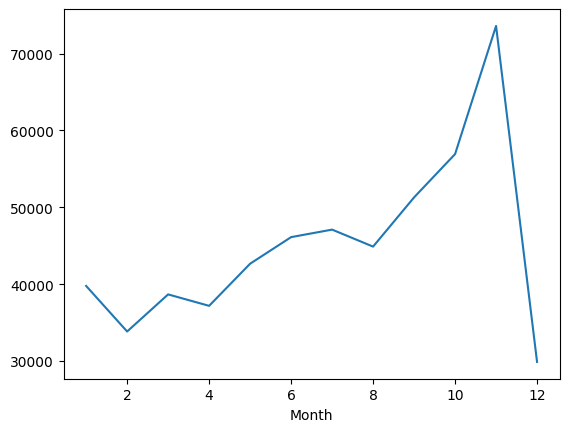

In [34]:
groupby_Month.plot() #Пик продаж ноябрь. С декабря резкое падение продаж

# Географический анализ

In [35]:
#Сумма продаж
sum_Totalsale=df['Totalsale'].sum()
sum_Totalsale

9747747.929999998

In [36]:
# Топ 10 стран по сумме продаж. 
top_10_Country=df.groupby('Country')['Totalsale'].sum().sort_values(ascending=False).to_frame().head(10).reset_index()
top_10_Country

,Country,Totalsale
0,United Kingdom,8187806.36
1,Netherlands,284661.54
2,EIRE,263276.82
3,Germany,221698.21
4,France,197403.90
5,Australia,137077.27
6,Switzerland,56385.35
7,Spain,54774.58
8,Belgium,40910.96
9,Sweden,36595.91


In [396]:
#добавление столбца - процент от всей суммы продажи.В  Великобритании самый большой объем продаж - 83,9% от общих продаж
top_10_Country['percentage'] = [i*100/sum_Totalsale for i in top_10_Country['Totalsale'].round(2)]

In [397]:
##добавление знака процента.
top_10_Country['percentage'] =top_10_Country['percentage'].astype(str) + '%'
top_10_Country

,Country,Totalsale,percentage
0,United Kingdom,8187806.36,83.99690286205423%
1,Netherlands,284661.54,2.9202800692446713%
2,EIRE,263276.82,2.700898934714247%
3,Germany,221698.21,2.274353128456411%
4,France,197403.90,2.0251231506763023%
5,Australia,137077.27,1.4062455347057792%
6,Switzerland,56385.35,0.5784448921423845%
7,Spain,54774.58,0.5619203573311935%
8,Belgium,40910.96,0.41969653189421374%
9,Sweden,36595.91,0.37542938392334907%


C:\Users\design\AppData\Local\Temp\ipykernel_68988\1868221420.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



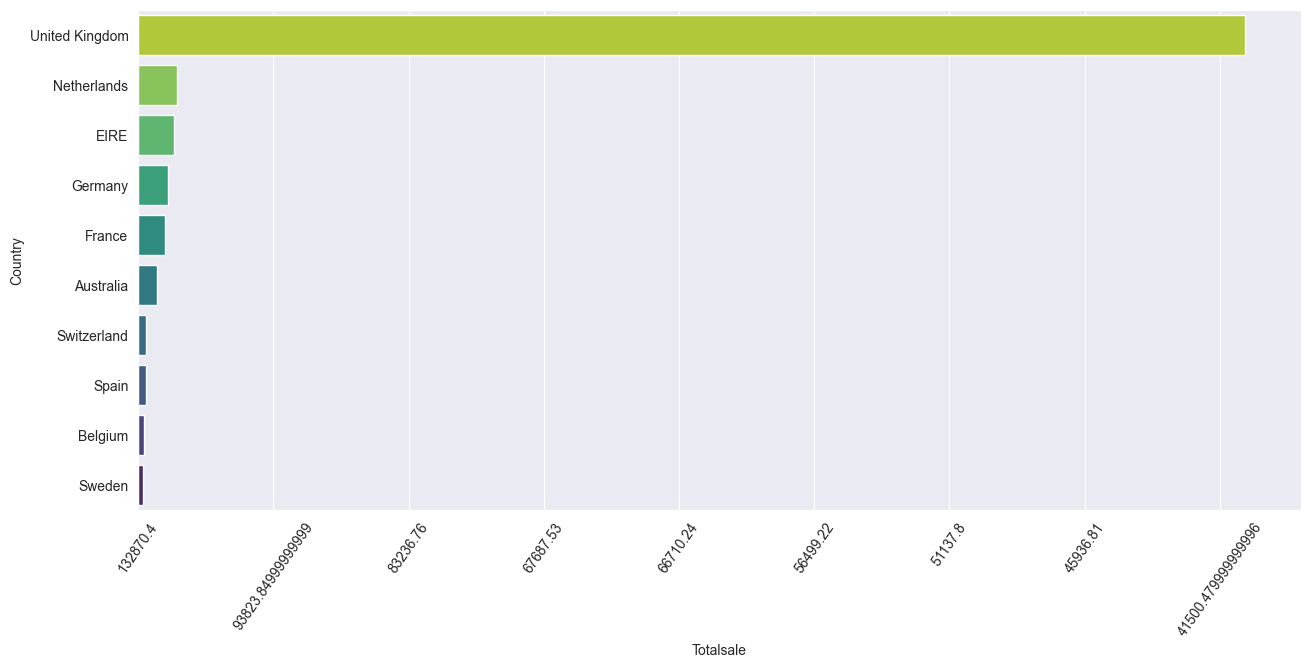

In [390]:
plt.figure(figsize=(15,6.5))
sns.set_style('darkgrid')
g = sns.barplot(data=top_10_Country,y= 'Country', x='Totalsale', palette='viridis_r')
g.set_xticklabels(top_30_products['Totalsale'], rotation=55, fontdict={'fontsize':10})
plt.show()

# Лидирующие продукты по продажам

In [41]:
#Количество уникальных продуктов
len(df_without_null['Description'].unique())

3896

In [42]:
#Сумма продаж без нулевых значений Description
sum_sale_Description=df_without_null['Totalsale'].sum()
sum_sale_Description

8300065.8100000005

In [43]:
# групировка по продукту и их сумма
groupby_Description =df_without_null.groupby(['Description'])['Totalsale'].sum().to_frame().reset_index()
groupby_Description

,Description,Totalsale
0,4 PURPLE FLOCK DINNER CANDLES,270.76
1,50'S CHRISTMAS GIFT BAG LARGE,2269.75
2,DOLLY GIRL BEAKER,2750.75
3,I LOVE LONDON MINI BACKPACK,1454.00
4,I LOVE LONDON MINI RUCKSACK,4.15
...,...,...
3891,ZINC T-LIGHT HOLDER STARS SMALL,3843.46
3892,ZINC TOP 2 DOOR WOODEN SHELF,92.75
3893,ZINC WILLIE WINKIE CANDLE STICK,2166.75
3894,ZINC WIRE KITCHEN ORGANISER,156.80


In [44]:
 groupby_Description[groupby_Description['Totalsale'] < 0]


,Description,Totalsale
60,3 WICK CHRISTMAS BRIAR CANDLE,-7.50
188,ANTIQUE LILY FAIRY LIGHTS,-14.85
245,ASSORTED TUTTI FRUTTI ROUND BOX,-39.60
432,BLUE FLYING SINGING CANARY,-3.75
456,BLUE PADDED SOFT MOBILE,-25.50
660,CHALKBOARD KITCHEN ORGANISER,-87.80
870,CREAM SWEETHEART MAGAZINE RACK,-46.85
872,CREAM SWEETHEART SHELF + HOOKS,-7.95
873,CREAM SWEETHEART TRAYS,-12.75
882,CRUK Commission,-7933.43


In [45]:
#27 продуктов с  отрицательными значениям,можно сделать вывод, что их если и покупают , то возвращают. Стоит пересмотреть данные продукты: отказать от их продажи или улучшить качество.
len(groupby_Description[groupby_Description['Totalsale'] < 0])

27

In [46]:
#Продукты не пользующиеся спросам. Стоит пересмотреть данные продукты: отказать от их продажи или улучшить реламу по ним. 
groupby_Description[groupby_Description['Totalsale'] == 0]

,Description,Totalsale
34,2 DAISIES HAIR COMB,0.0
338,BLACK 3 BEAD DROP EARRINGS,0.0
346,BLACK CHERRY LIGHTS,0.0
795,CLASSIC DIAMANTE EARRINGS JET,0.0
920,DAISY HAIR COMB,0.0
959,DIAMANTE HAIR GRIP PACK/2 CRYSTAL,0.0
962,DIAMANTE HAIR GRIP PACK/2 PERIDOT,0.0
1061,DROP DIAMANTE EARRINGS GREEN,0.0
1429,GLASS CAKE COVER AND PLATE,0.0
1591,HANGING RIDGE GLASS T-LIGHT HOLDER,0.0


In [47]:
# 30 лидирующих продуктов
top_30_products=groupby_Description.sort_values(by='Totalsale', ascending=False).head(30)
top_30_products

,Description,Totalsale
2780,REGENCY CAKESTAND 3 TIER,132870.40
3716,WHITE HANGING HEART T-LIGHT HOLDER,93823.85
1771,JUMBO BAG RED RETROSPOT,83236.76
2355,PARTY BUNTING,67687.53
2624,POSTAGE,66710.24
217,ASSORTED COLOUR BIRD ORNAMENT,56499.22
2669,RABBIT NIGHT LIGHT,51137.80
725,CHILLI LIGHTS,45936.81
2323,PAPER CHAIN KIT 50'S CHRISTMAS,41500.48
2405,PICNIC BASKET WICKER 60 PIECES,39619.50


In [48]:
#добавление столбца - процент от всей суммы продажи
top_30_products['percentage'] = [i*100/sum_sale_Description for i in top_30_products['Totalsale']]

In [49]:
#добавление знака процента
top_30_products['percentage'] =top_30_products['percentage'].astype(str) + '%'

In [50]:
top_30_products 

,Description,Totalsale,percentage
2780,REGENCY CAKESTAND 3 TIER,132870.40,1.6008354998814158%
3716,WHITE HANGING HEART T-LIGHT HOLDER,93823.85,1.1303988684880077%
1771,JUMBO BAG RED RETROSPOT,83236.76,1.0028445786503948%
2355,PARTY BUNTING,67687.53,0.8155059435607053%
2624,POSTAGE,66710.24,0.8037314586063505%
217,ASSORTED COLOUR BIRD ORNAMENT,56499.22,0.6807080966988139%
2669,RABBIT NIGHT LIGHT,51137.80,0.6161131871796568%
725,CHILLI LIGHTS,45936.81,0.553451153901152%
2323,PAPER CHAIN KIT 50'S CHRISTMAS,41500.48,0.5000018186602787%
2405,PICNIC BASKET WICKER 60 PIECES,39619.50,0.4773395887086346%


C:\Users\design\AppData\Local\Temp\ipykernel_68988\2281669745.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



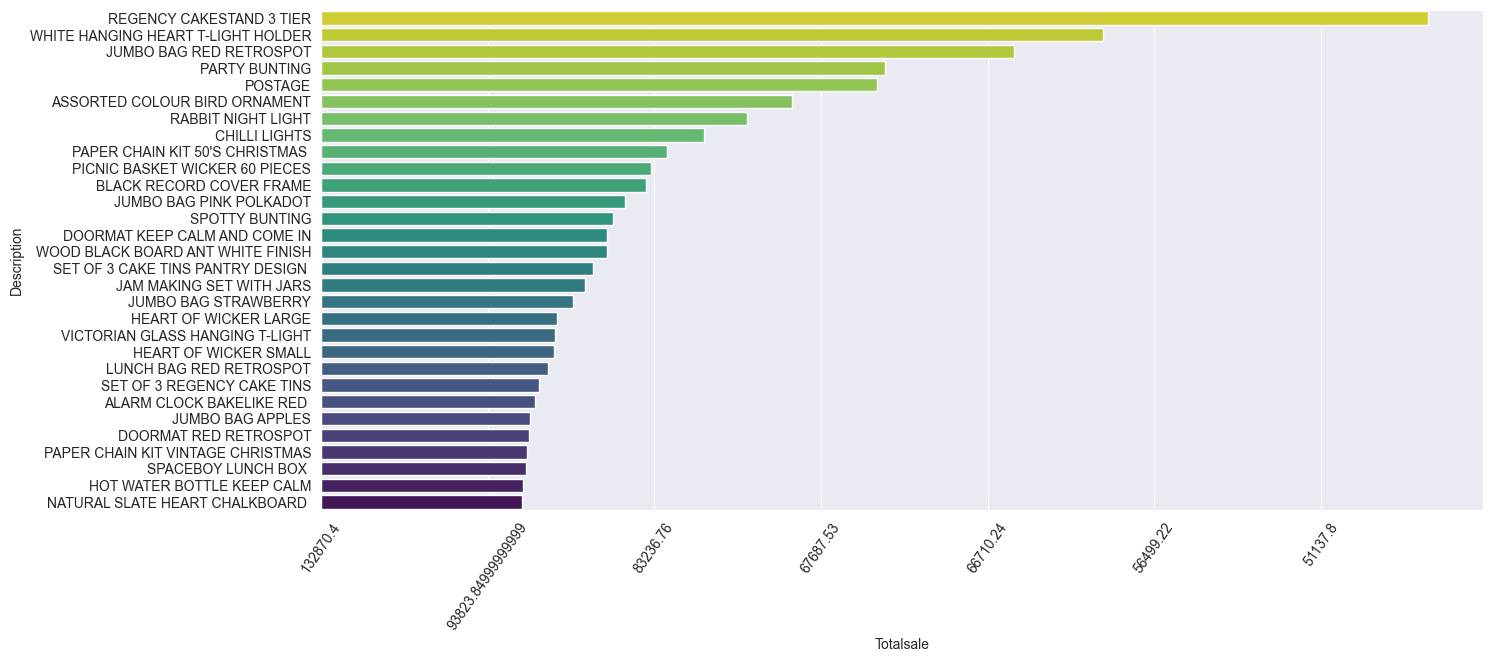

In [387]:
plt.figure(figsize=(15,6.5))
sns.set_style('darkgrid')
g = sns.barplot(data=top_30_products,y= 'Description', x='Totalsale', palette='viridis_r')
g.set_xticklabels(top_30_products['Totalsale'], rotation=55, fontdict={'fontsize':10})
plt.show()

# Cредний чек

In [51]:
#Количество уникальных клиентов
Customer_unique=len(df['CustomerID'].unique())
Customer_unique

4373

In [52]:
sum_sale=df_without_null['Totalsale'].sum()
sum_sale

8300065.8100000005

In [53]:
#средний доход от клиента/средний чек
avg_prise_customer=sum_sale/Customer_unique
avg_prise_customer

1898.025568259776

# RFM  анализ


Цель RFM анализа сформировать сегменты и в зависимости от сегмента воздействовать на них определенным образом. Например: предложить бонус, льготу, отправить push или email уведомление. Важно делать это таргетировано.

Эффект от использования RFM анализа может быть следующим: удержание клиентов, повышение дохода, повышение лояльность клиентов.

Интерпретации сегментов RFM анализа:

R=5, F=5, M=5 — платят чаcто, много и недавно. Самые лояльным и активные пользователи. R=1, F=1, M=1 — платят мало, редко и давно. Скорее всего потерянные клиенты. Возможно не стоит предпринять действия по их возврату, если цена привлечения выше ожидаемой прибыли. R=1/2, F=4/5, M=4/5 — лояльные пользователи на грани ухода. Предлагаем им бонус, скидку и пытаемся их вернуть. R=4/5, F=1, M=1/2/3/4/5 — пользователи недавно совершили платеж. Пробуем их стимулировать покупать еще.

In [66]:
#Создание recency, frequency и monetary: групировка записей по CustomerID.Вместо текущей даты используется max+1, т.к.данные давние.
last_date = df_without_null['InvoiceDate'].max()+ timedelta(days=1)
rfmTable =df_without_null.reset_index().groupby('CustomerID').agg({'InvoiceDate': lambda x: (last_date - x.max()).days,
                                                 'InvoiceNo': lambda x: len(x), 
                                                 'Totalsale': lambda x: x.sum()})


In [67]:
rfmTable.head(5)

,InvoiceDate,InvoiceNo,Totalsale
CustomerID,,,
12346.0,327,2,0.00
12347.0,41,182,4310.00
12348.0,77,31,1797.24
12349.0,20,73,1757.55
12350.0,312,17,334.40


In [68]:
rfmTable.rename(columns={'InvoiceDate': 'recency', 
                          'InvoiceNo': 'frequency', 
                         'Totalsale': 'monetary_value'}, inplace=True)

In [69]:
rfmTable.head(5)

,recency,frequency,monetary_value
CustomerID,,,
12346.0,327,2,0.00
12347.0,41,182,4310.00
12348.0,77,31,1797.24
12349.0,20,73,1757.55
12350.0,312,17,334.40


In [70]:
#Выставление оценок. Разбитие на диапазон от 1 до 5
quantiles = rfmTable.quantile(q=[0.20, 0.40, 0.60, 0.80])
quantiles = quantiles.to_dict()
segmented_rfm = rfmTable

def RScore(x,p,d):
     if x <= d[p][0.20]:
         return 1
     elif x <= d[p][0.40]:
         return 2
     elif x <= d[p][0.60]: 
         return 3
     elif x<=d[p][0.80]:
         return 4
     else:
         return 5

segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(RScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(RScore, args=('monetary_value',quantiles,))
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
print(segmented_rfm.head())

            recency  frequency  monetary_value  r_quartile  f_quartile  \
CustomerID                                                               
12346.0         327          2            0.00           5           1   
12347.0          41        182         4310.00           3           5   
12348.0          77         31         1797.24           3           3   
12349.0          20         73         1757.55           2           4   
12350.0         312         17          334.40           5           2   

            m_quartile RFMScore  
CustomerID                       
12346.0              1      511  
12347.0              5      355  
12348.0              4      334  
12349.0              4      244  
12350.0              2      522  


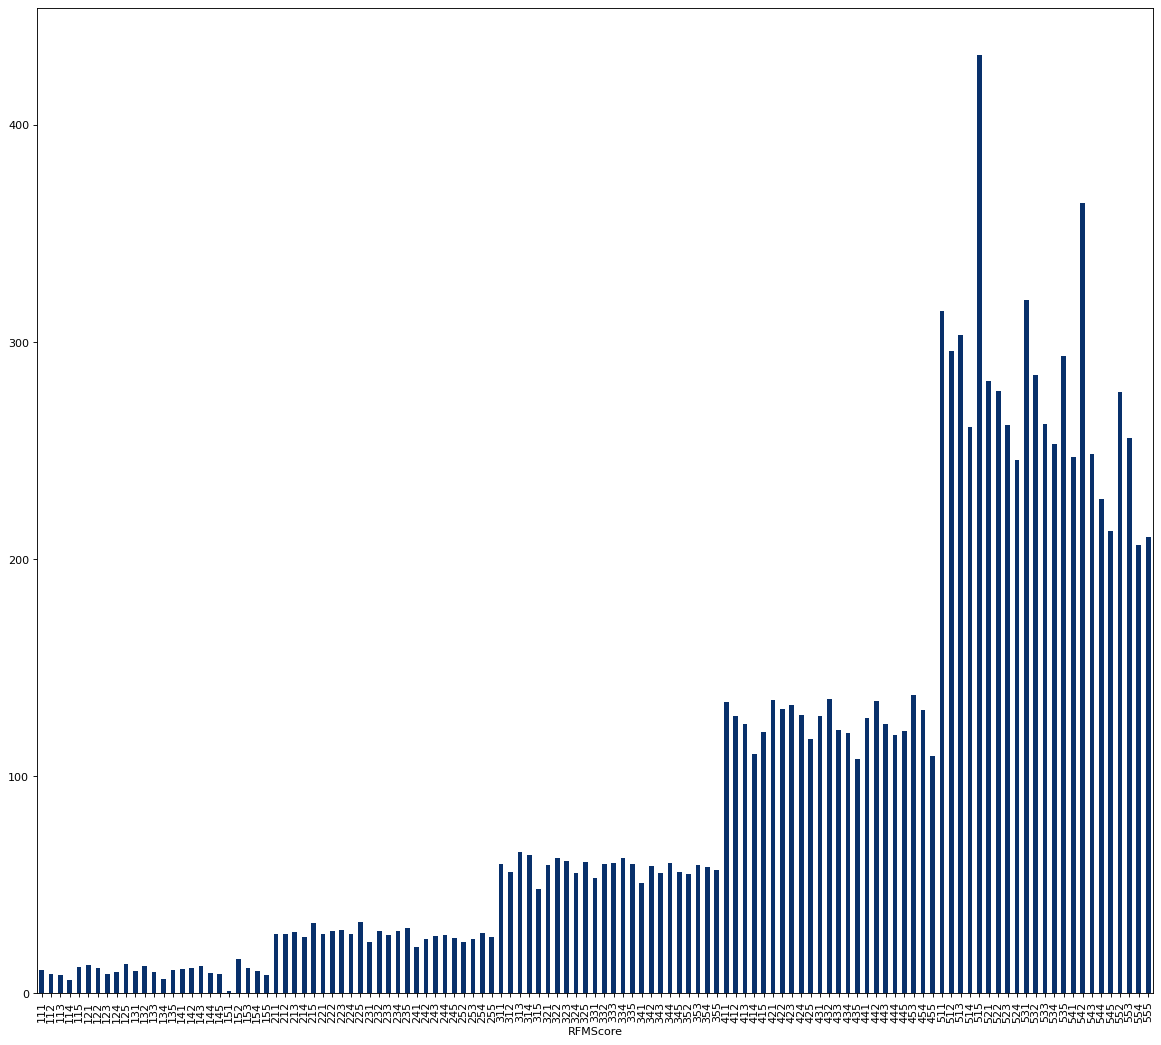

In [71]:
#среднее значение recency по всем RFMScore.
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
segmented_rfm.groupby('RFMScore').agg('recency').mean().plot(kind='bar', colormap='Blues_r')
plt.show()

# Прогнозирование продаж

In [72]:
df_without_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   InvoiceTime  406829 non-null  object        
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Totalsale    406829 non-null  float64       
 8   CustomerID   406829 non-null  float64       
 9   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 34.1+ MB


In [329]:
df =df_without_null.groupby(['InvoiceDate'])['InvoiceNo'].count().to_frame().reset_index()
df

,InvoiceDate,InvoiceNo
0,2010-01-12,1968
1,2010-02-12,2044
2,2010-03-12,1117
3,2010-05-12,2724
4,2010-06-12,1974
...,...,...
300,2011-12-06,1073
301,2011-12-07,763
302,2011-12-08,707
303,2011-12-09,1507


df['ds']=df.index
df

In [330]:
df.rename(columns={'InvoiceDate':'ds','InvoiceNo': 'y'}, inplace=True)
df

,ds,y
0,2010-01-12,1968
1,2010-02-12,2044
2,2010-03-12,1117
3,2010-05-12,2724
4,2010-06-12,1974
...,...,...
300,2011-12-06,1073
301,2011-12-07,763
302,2011-12-08,707
303,2011-12-09,1507


In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      305 non-null    datetime64[ns]
 1   y       305 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.9 KB


In [332]:
df=df.sort_values(by='ds')
df

,ds,y
0,2010-01-12,1968
1,2010-02-12,2044
2,2010-03-12,1117
3,2010-05-12,2724
4,2010-06-12,1974
...,...,...
300,2011-12-06,1073
301,2011-12-07,763
302,2011-12-08,707
303,2011-12-09,1507


In [333]:
#Последние даты данных
df.tail()

,ds,y
300,2011-12-06,1073
301,2011-12-07,763
302,2011-12-08,707
303,2011-12-09,1507
304,2011-12-10,1596


In [334]:
df.hist?

array([[<AxesSubplot: title={'center': 'ds'}>]], dtype=object)

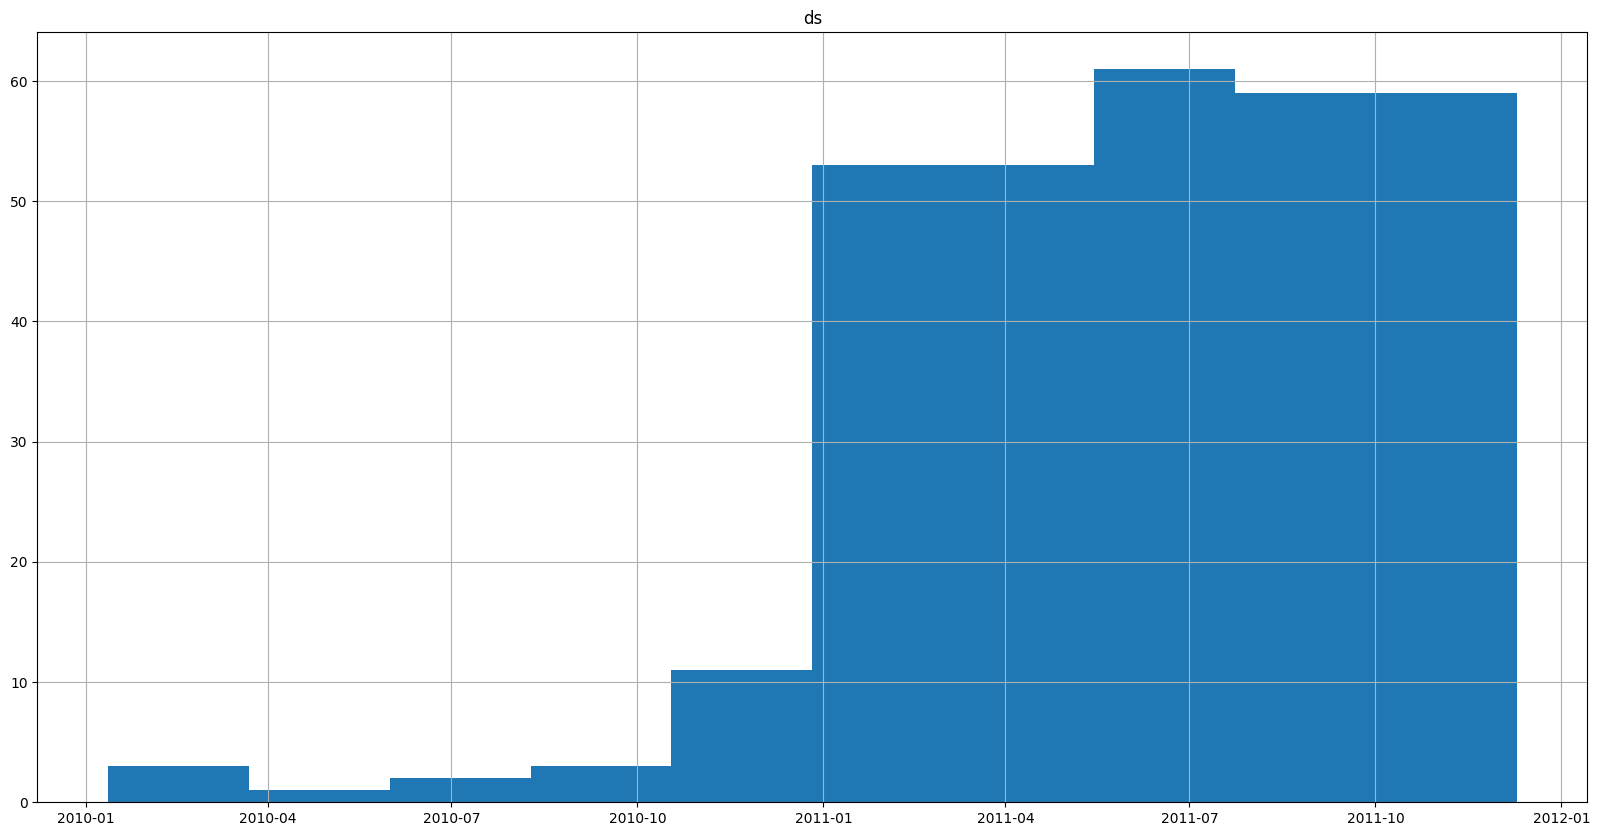

In [335]:
df.hist('ds',figsize=(20,10))

In [336]:
#Последние даты данных
df.tail()

,ds,y
300,2011-12-06,1073
301,2011-12-07,763
302,2011-12-08,707
303,2011-12-09,1507
304,2011-12-10,1596


In [337]:
#df=df.astype({'y':int})

In [338]:
#df['ds']=pd.to_datetime(df['ds'], format='%Y%m%d')
#df

In [339]:
# Добавление праздников United Kingdom (83.9% покупателей от туда) за 2010 и 2011 года, т.к у нас в жанных только эти года, для их учёта моделью
holidays_dict = holidays.UK(years=(2010, 2011))
df_holidays = pd.DataFrame.from_dict(holidays_dict, orient='index') \
    .reset_index()
df_holidays = df_holidays.rename({'index':'ds', 0:'holiday'}, axis ='columns')
df_holidays['ds'] = pd.to_datetime(df_holidays.ds)
df_holidays = df_holidays.sort_values(by=['ds'])
df_holidays = df_holidays.reset_index(drop=True)
df_holidays

,ds,holiday
0,2010-01-01,New Year's Day
1,2010-01-02,New Year Holiday [Scotland]
2,2010-01-04,New Year Holiday [Scotland] (Observed)
3,2010-03-17,St. Patrick's Day [Northern Ireland]
4,2010-04-02,Good Friday
5,2010-04-05,Easter Monday [England/Wales/Northern Ireland]
6,2010-05-03,May Day
7,2010-05-31,Spring Bank Holiday
8,2010-07-12,Battle of the Boyne [Northern Ireland]
9,2010-08-02,Summer Bank Holiday [Scotland]


In [340]:
# Период, который надо отрезать и предсказать (проверка модели)
predictions = 30

In [399]:
#predictions брала разный , на 30 дней самая маленькая ошибка

In [342]:
# Отрезаем из обучающей выборки последние N точек, чтобы измерить на них качество
train_df = df[:-predictions]

In [343]:
# Настраиваем prophet – говорим ему учитывать праздники, сезонности и год
m = Prophet(holidays=df_holidays, daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False)
m.fit(train_df)

16:16:05 - cmdstanpy - INFO - Chain [1] start processing
16:16:06 - cmdstanpy - INFO - Chain [1] done processing


In [344]:
# Предсказываем отрезок для проверки
future = m.make_future_dataframe(periods=predictions)
forecast = m.predict(future)

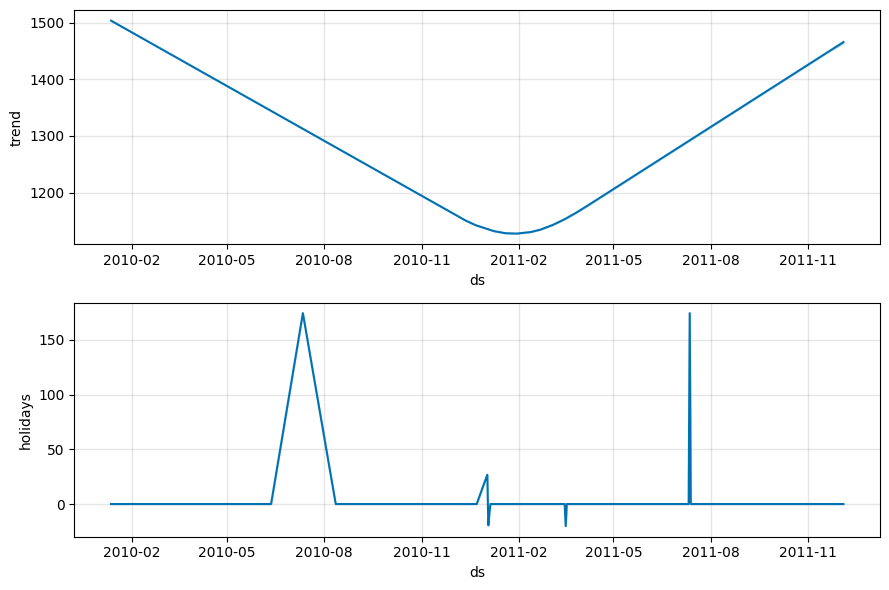

In [345]:
# Смотрим на сезонности
m.plot_components(forecast);

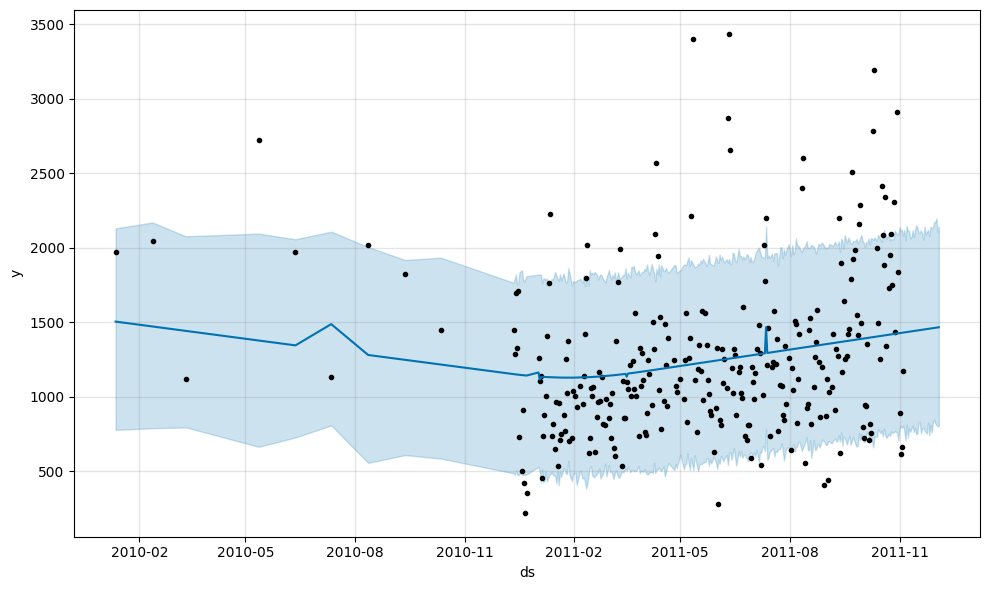

In [346]:
# Смотрим, что предсказалось
m.plot(forecast);

In [347]:
# Рисуем график с границами прогноза
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)

iplot([
    go.Scatter(x=df['ds'], y=df['y'], name='fact'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='prediction'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill='tonexty', mode='none', name='upper'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill='tonexty', mode='none', name='lower'),
    go.Scatter(x=forecast['ds'], y=forecast['trend'], name='trend')
])

In [348]:
# Смотрим на ошибки модели
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds'))
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
print('MAPE (средняя абсолютная ошибка в процентах) – ', np.mean(abs(cmp_df[-predictions:]['p'])),'%')
print('MAE (средняя абсолютная ошибка) – ', np.mean(abs(cmp_df[-predictions:]['e'])))

MAPE (средняя абсолютная ошибка в процентах) –  38.03246567223211 %
MAE (средняя абсолютная ошибка) –  923.2497646526213


In [349]:
# Прогнозируем на полный период (указываем количество дней , тут 6 месяца)
prediction_days = 180
final_train_df = df
f = Prophet(holidays=df_holidays, daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=False)
f.fit(final_train_df)
final_future = f.make_future_dataframe(periods=prediction_days)
final_forecast = f.predict(final_future)

16:16:13 - cmdstanpy - INFO - Chain [1] start processing
16:16:14 - cmdstanpy - INFO - Chain [1] done processing


In [350]:
final_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Battle of the Boyne [Northern Ireland],Battle of the Boyne [Northern Ireland]_lower,Battle of the Boyne [Northern Ireland]_upper,Boxing Day,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-12,1278.007742,606.844601,2030.122106,1278.007742,1278.007742,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,57.901137,57.901137,57.901137,0.0,0.0,0.0,1335.908879
1,2010-02-12,1261.759532,402.616931,1835.235557,1261.759532,1261.759532,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-118.045013,-118.045013,-118.045013,0.0,0.0,0.0,1143.714519
2,2010-03-12,1247.083730,436.670325,1852.992164,1247.083730,1247.083730,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-118.045013,-118.045013,-118.045013,0.0,0.0,0.0,1129.038717
3,2010-05-12,1215.111445,435.750899,1903.446171,1215.111445,1215.111445,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-14.691647,-14.691647,-14.691647,0.0,0.0,0.0,1200.419798
4,2010-06-12,1198.863235,484.597502,1922.381329,1198.863235,1198.863235,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-31.723878,-31.723878,-31.723878,0.0,0.0,0.0,1167.139357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,2012-06-03,2063.220240,1356.127421,2787.685340,2015.878066,2108.630906,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-13.473605,-13.473605,-13.473605,0.0,0.0,0.0,2049.746635
481,2012-06-04,2065.369061,1419.957890,2829.674763,2017.733026,2111.184510,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,33.493906,33.493906,33.493906,0.0,0.0,0.0,2098.862967
482,2012-06-05,2067.517882,1350.201434,2837.521489,2019.557205,2113.735026,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,57.901137,57.901137,57.901137,0.0,0.0,0.0,2125.419018
483,2012-06-06,2069.666703,1374.359798,2794.984117,2021.381385,2116.268432,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-14.691647,-14.691647,-14.691647,0.0,0.0,0.0,2054.975056


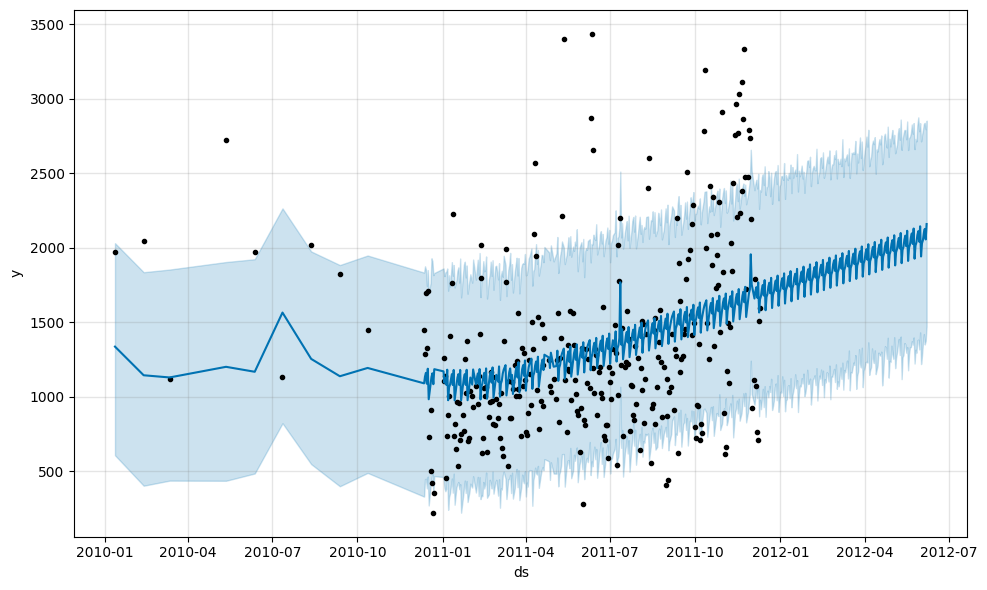

In [351]:
# Смотрим, что предсказалось на полный период
f.plot(final_forecast);

In [352]:
# Рисуем график с границами прогноза на полном периоде
iplot([
    go.Scatter(x=df['ds'], y=df['y'], name='fact'),
    go.Scatter(x=final_forecast['ds'], y=final_forecast['yhat'], name='yhat'),
    go.Scatter(x=final_forecast['ds'], y=final_forecast['yhat_upper'], fill='tonexty', mode='none', name='upper'),
    go.Scatter(x=final_forecast['ds'], y=final_forecast['yhat_lower'], fill='tonexty', mode='none', name='lower'),
    go.Scatter(x=final_forecast['ds'], y=final_forecast['trend'], name='trend')
])